## Simple Linear Regression

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("SOCR-HeightWeight.csv")

In [3]:
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


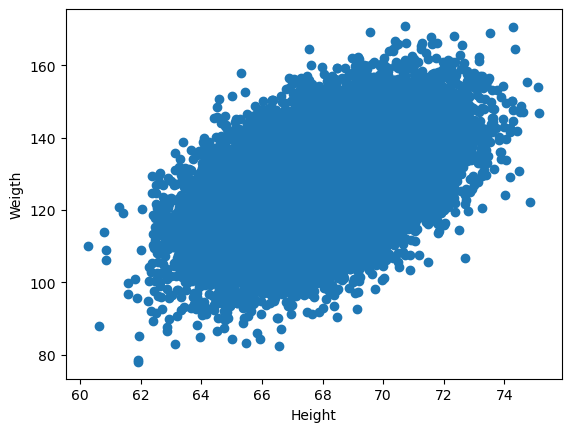

In [4]:
## plotting the dataset into scatter plot
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'])
plt.xlabel("Height")
plt.ylabel("Weigth")
plt.show()

## we have to create a best fit line

In [21]:
## divide out dataset in dependend and independent dataset
X = df[['Height(Inches)']] ## independent features
Y = df['Weight(Pounds)'] ## dependent features

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
X.shape

(25000, 1)

In [25]:
Y.shape

(25000,)

In [26]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((20000, 1), (5000, 1), (5000,), (20000,))

## Now we will be standardizing the dataset

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
plt.scatter(X_train , Y_train)

## Training our Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [42]:
regressor.coef_

array([5.82644432])

In [44]:
print("The slope or coeffiecient of weight is", regressor.coef_)

The slope or coeffiecient of weight is [5.82644432]


In [45]:
print("The interceot of the weight is", regressor.intercept_)

The interceot of the weight is 127.07814619150001


In [49]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

## Prediction of Train Data
1.  Predicted Weigth Output = intercept + coef_(heights)
2.  Y_pred_train = 127.07 + 5.82(X_train)

## Prediction of Test Data
1. Predicted Height Output = intercept + coef_(X_train)
2. Y_pred_test = 127.07 + 5.82(X_test)

In [50]:
Y_pred_test = regressor.predict(X_test)

In [52]:
Y_pred_test,Y_test

(array([-81.80384547, -84.06121863, -78.39901435, ..., -81.08423563,
        -79.62131496, -83.13286527]),
 6868     134.2855
 24016    111.9666
 9668     135.9871
 13640    126.3802
 14018    100.1810
            ...   
 8670     138.0941
 11839    105.2101
 4013     141.1859
 21147    129.5261
 695      134.7527
 Name: Weight(Pounds), Length: 5000, dtype: float64)

In [53]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.predict(X_train), 'r')

ValueError: x and y must be the same size

## Performance Metrics
1. MAE, MSE , RMSE
2. R-Square and Adjusted R-Square

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
mse = mean_squared_error(Y_test, Y_pred_test)
mae = mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [5000, 20000]

## R-Square Method

In [57]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred_test)

ValueError: Found input variables with inconsistent numbers of samples: [5000, 20000]

In [58]:
score

NameError: name 'score' is not defined

## Adjusted R-Square Method

In [59]:
1-(1-score) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

NameError: name 'score' is not defined

In [60]:
regressor

LinearRegression()

In [67]:
## new data point height is 124
scaled_height = scaler.transform([[124]])

In [70]:
scaled_height

array([[124.]])

In [69]:
scaled_height[0]

array([124.])

In [68]:
print("the height prediction for heigth 124 inches is " , regressor.predict(scaled_height[[0]]))

the height prediction for heigth 124 inches is  [849.55724162]


In [73]:
## Assumption
## plot a scatter plot for predictions
plt.scatter(Y_test, Y_pred_test)

ValueError: x and y must be the same size

In [74]:
## residuals :- Differenece between test and test predicted data
import seaborn as sns
residuals = Y_test, Y_pred_test
residuals

(6868     134.2855
 24016    111.9666
 9668     135.9871
 13640    126.3802
 14018    100.1810
            ...   
 8670     138.0941
 11839    105.2101
 4013     141.1859
 21147    129.5261
 695      134.7527
 Name: Weight(Pounds), Length: 5000, dtype: float64,
 array([-81.80384547, -84.06121863, -78.39901435, ..., -81.08423563,
        -79.62131496, -83.13286527]))

In [76]:
sns.distplot(residuals,kde= True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24304\598353519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde= True)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.